# Digit Recognizer
Identifying the handwritten digits.

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Analysis

In [2]:
# read the data from the train and test csv files
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

In [3]:
train_df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
print('Training dataset shape: ', train_df.shape)
print('Testing dataset shape: ', test_df.shape)

Training dataset shape:  (42000, 785)
Testing dataset shape:  (28000, 784)


In [5]:
# check for null values
train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
# check for null values
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
(Y, X) = (train_df['label'], train_df.drop(['label'], axis = 1))

## Data Visualization

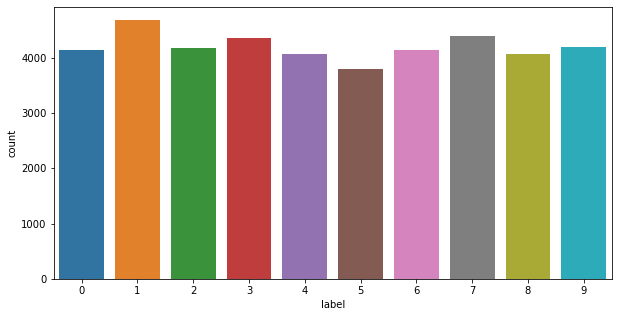

In [8]:
plt.figure(figsize = [10, 5])
sns.countplot(Y);

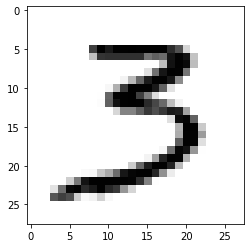

In [9]:
# see any image of the dataset
i = 25
img = X.values[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray');

## Preprocessing of data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split into training and validation set
(X_train, X_val, Y_train, Y_val) = train_test_split(X.values, Y.values, test_size=0.3)

# Reshape the datasets
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_val = Y_val.reshape(X_val.shape[0], 1)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_val shape:" + str(X_val.shape))
print("Y_val shape:" + str(Y_val.shape))

X_train shape:(29400, 784)
Y_train shape:(29400, 1)
X_val shape:(12600, 784)
Y_val shape:(12600, 1)


In [12]:
# normalize the xalues
X_train = X_train/255.0
X_val = X_val/255.0

## Deep Neural Network using Keras

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [14]:
# define the model
model = Sequential()
model.add(Input(shape = (784, )))
model.add(Dense(35, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35)                27475     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 28,405
Trainable params: 28,405
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 512, validation_split = 0.2)

Epoch 1/25
46/46 [==============================] - 1s 19ms/step - loss: 1.5564 - accuracy: 0.5793 - val_loss: 0.8418 - val_accuracy: 0.8131
Epoch 2/25
46/46 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.8594 - val_loss: 0.4635 - val_accuracy: 0.8796
Epoch 3/25
46/46 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.8991 - val_loss: 0.3708 - val_accuracy: 0.8981
Epoch 4/25
46/46 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.9148 - val_loss: 0.3290 - val_accuracy: 0.9104
Epoch 5/25
46/46 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.9239 - val_loss: 0.2994 - val_accuracy: 0.9165
Epoch 6/25
46/46 [==============================] - 0s 7ms/step - loss: 0.2468 - accuracy: 0.9302 - val_loss: 0.2815 - val_accuracy: 0.9204
Epoch 7/25
46/46 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.9358 - val_loss: 0.2644 - val_accuracy: 0.9257
Epoch 8/25
46/46 [=

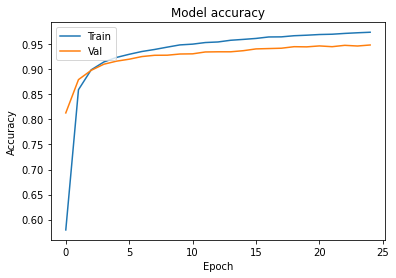

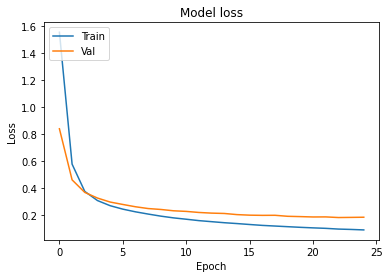

In [18]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [19]:
# find the accuracy on train and validation set
train_loss, train_acc = model.evaluate(X_train, Y_train)
val_loss, val_acc = model.evaluate(X_val, Y_val)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(val_acc * 100)  + "%")

394/394 [==============================] - 1s 1ms/step - loss: 0.1822 - accuracy: 0.9490
Accuracy on train set is 97.027212%
Accuracy on validation set is 94.896823%


## Using Sklearn

In [20]:
# import the required modules
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
svm_cl = SVC(gamma=0.001)
svm_cl.fit(X_train, Y_train)

# train score
svm_train_score = round(svm_cl.score(X_train, Y_train) * 100, 2)
svm_val_score = round(svm_cl.score(X_val, Y_val) * 100, 2)
# predicted output
Y_pred_svm = svm_cl.predict(X_val)

print('SVM train score: ', svm_train_score)
print('SVM validation score: ', svm_val_score)
print('Classification Report: \n', classification_report(Y_val, Y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(Y_val, Y_pred_svm))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM train score:  93.47
SVM validation score:  92.63
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1196
           1       0.94      0.97      0.96      1420
           2       0.93      0.92      0.92      1310
           3       0.91      0.89      0.90      1331
           4       0.91      0.95      0.93      1177
           5       0.88      0.90      0.89      1175
           6       0.94      0.96      0.95      1212
           7       0.95      0.93      0.94      1308
           8       0.91      0.88      0.90      1205
           9       0.92      0.89      0.91      1266

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600

Confusion Matrix:
 [[1153    0    3    2    5   11   12    1    8    1]
 [   0 1384    4    4    1    7    4    1   11    4]
 [   5    8 1205   11   17    6   16  

## Generate and write the outputs to the csv file

In [22]:
X_test = test_df.values
Y_test = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


The model predicted it as: 2


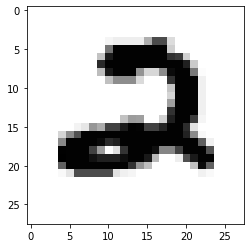

In [23]:
# check the predictions
i = 0
img = X_test[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

print("The model predicted it as: %i" %Y_test[i])

In [24]:
ids = np.array([i + 1 for i in range(X_test.shape[0])])
ans = {'ImageId': ids, 'Label': Y_test}

In [25]:
df = pd.DataFrame(ans)

In [26]:
df.to_csv('output.csv', index = False)